In [6]:
import numpy as np

def unit_step_function(x):
  return np.where(x>0,1,0)

class Perceptron:

  def __init__(self, lr=1e-3, num_iters=1000):
    self.lr = lr
    self.num_iters = num_iters
    self.activation_function = unit_step_function
    self.w = None
    self.b = None

  def fit(self,X,y):
    n_samples, n_features = X.shape

    #init the params
    self.w = np.zeros(n_features)
    self.b = 0

    y_ = np.where(y>0,1,0)

    #Learning
    for _ in range(self.num_iters):
      for idx, x_i in enumerate(X):
        linear_output = np.dot(x_i,self.w) + self.b
        y_pred = self.activation_function(linear_output)

        #Updation of Weights
        update = self.lr * (y_[idx] - y_pred)
        self.w += update * x_i
        self.b += update


  def predict(self,X):
    linear_output = np.dot(X,self.w) + self.b
    return self.activation_function(linear_output)

1.0


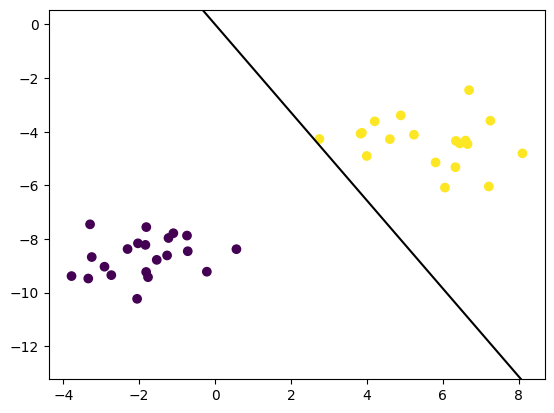

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = Perceptron(1e-2, num_iters=1000)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-model.w[0] * x0_1 - model.b) / model.w[1]
x1_2 = (-model.w[0] * x0_2 - model.b) / model.w[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()